<a href="https://colab.research.google.com/github/datascience-uniandes/hypothesis-testing-tutorial/blob/master/hypothesis-testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ML - Supermercados Inteligentes

Univerisdad de los Andes MINE-4101: Applied Data Science  

- Lizeth Viviana Perdomo Castañeda
- David Esteban Fajardo Torres
  
**Dataset:** Dataset abierto de varios productos de mercado con sus etiquetas para identificar el tipo de productos. [dataset](https://github.com/marcusklasson/GroceryStoreDataset/tree/master/dataset).

**Business Context:** Los supermercados inteligentes están diseñados para mejorar todos los aspectos del proceso de compra, desde la entrada del cliente hasta la salida, utilizando tecnologías avanzadas para automatizar tareas, gestionar inventarios en tiempo real y analizar el comportamiento del consumidor.

Un nuevo supermercado inteligente, ha implementado tecnologías avanzadas como sensores y cámaras. Para iniciar la automatización de procesos, ahora necesita aprovechar mejor los datos generados a diario para tomar decisiones más informadas y eficaces.

El supermercado requiere el desarrollo de un sistema de automatización que permita a los clientes tomar productos y salir sin pasar por caja, mientras las cámaras y sensores registran automáticamente los artículos seleccionados.


In [1]:
%pip install tensorflow

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: tensorflow in c:\users\lperd\appdata\local\programs\python\python312\lib\site-packages (2.18.0)




[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.optimizers import Adam

### Carga y exploración del Dataset

In [3]:
base_dir = r'C:\Users\lperd\OneDrive - Universidad de los andes\MINE 2024-2\CIENCIA DE DATOS APLICADA\Talleres\Taller 2\GroceryStoreDataset\new_dataset'

In [4]:
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')

print(train_dir)


C:\Users\lperd\OneDrive - Universidad de los andes\MINE 2024-2\CIENCIA DE DATOS APLICADA\Talleres\Taller 2\GroceryStoreDataset\new_dataset\train


In [5]:
# import shutil
# subdirs = ['train', 'val', 'test'] 
# for subdir in subdirs:
#     subdir_path = os.path.join(base_dir, subdir)  
#     for category in os.listdir(subdir_path):  
#         category_path = os.path.join(subdir_path, category)        
#         if os.path.isdir(category_path):             
#             for product in os.listdir(category_path): 
#                 product_path = os.path.join(category_path, product) 
#                 if os.path.isdir(product_path): 
#                     shutil.move(product_path, subdir_path) 

# Eliminar las carpetas de nivel superior 
#                     
#             os.rmdir(category_path)

In [6]:
# Aumento de datos solo para el conjunto de entrenamiento
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    zoom_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest"
)

In [7]:
test_val_datagen = ImageDataGenerator(rescale=1./255)

In [8]:
# Generadores de imágenes
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),  
    batch_size=32,
    class_mode='categorical'
)

val_generator = test_val_datagen.flow_from_directory(
    val_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_val_datagen.flow_from_directory(
    test_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical'
)

print(train_generator.class_indices)

Found 1996 images belonging to 60 classes.
Found 296 images belonging to 60 classes.
Found 1889 images belonging to 60 classes.
{'Alpro-Blueberry-Soyghurt': 0, 'Alpro-Vanilla-Soyghurt': 1, 'Arla-Ecological-Medium-Fat-Milk': 2, 'Arla-Medium-Fat-Milk': 3, 'Arla-Mild-Vanilla-Yoghurt': 4, 'Arla-Sour-Cream': 5, 'Arla-Standard-Milk': 6, 'Asparagus': 7, 'Aubergine': 8, 'Avocado': 9, 'Banana': 10, 'Beef-Tomato': 11, 'Bravo-Apple-Juice': 12, 'Bravo-Orange-Juice': 13, 'Brown-Cap-Mushroom': 14, 'Cabbage': 15, 'Cantaloupe': 16, 'Carrots': 17, 'Conference': 18, 'Cucumber': 19, 'Floury-Potato': 20, 'Galia-Melon': 21, 'Garant-Ecological-Medium-Fat-Milk': 22, 'Garant-Ecological-Standard-Milk': 23, 'Ginger': 24, 'God-Morgon-Apple-Juice': 25, 'God-Morgon-Orange-Juice': 26, 'God-Morgon-Orange-Red-Grapefruit-Juice': 27, 'God-Morgon-Red-Grapefruit-Juice': 28, 'Golden-Delicious': 29, 'Granny-Smith': 30, 'Honeydew-Melon': 31, 'Kiwi': 32, 'Leek': 33, 'Lemon': 34, 'Lime': 35, 'Mango': 36, 'Oatly-Natural-Oatghu

In [9]:
def mostrar_imagenes(generator, num_images=5):
    x_batch, y_batch = next(generator)
    plt.figure(figsize=(10, 10))
    for i in range(num_images):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(x_batch[i])
        plt.axis('off')
    plt.show()

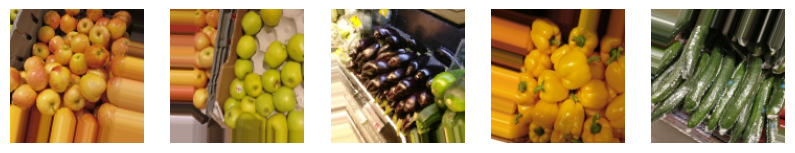

In [10]:
mostrar_imagenes(train_generator)

### Entrenamiento del modelo de Machine Learning

In [11]:
IMG_SIZE = (128, 128)
BATCH_SIZE = 32
EPOCHS = 10

In [12]:
# Modelo CNN básico
def crear_modelo_baseline():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3)),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(train_generator.num_classes, activation='softmax')
    ])
    model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [13]:
# Entrenar el modelo CNN básico
modelo_baseline = crear_modelo_baseline()
history_baseline = modelo_baseline.fit(
    train_generator,
    validation_data=val_generator,
    epochs=EPOCHS
)

c:\Users\lperd\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\lperd\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 41s 618ms/step - accuracy: 0.0283 - loss: 4.0570 - val_accuracy: 0.0507 - val_loss: 3.7558
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 18s 287ms/step - accuracy: 0.0861 - loss: 3.6695 - val_accuracy: 0.0676 - val_loss: 3.4841
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 18s 281ms/step - accuracy: 0.1061 - loss: 3.3719 - val_accuracy: 0.1351 - val_loss: 3.1756
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 19s 294ms/step - accuracy: 0.1434 - loss: 3.1019 - val_accuracy: 0.1622 - val_loss: 2.9475
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 19s 301ms/step - accuracy: 0.1778 - loss: 2.9140 - val_accuracy: 0.1858 - val_loss: 2.7414
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 18s 287ms/step - accuracy: 0.2341 - loss: 2.6219 - val_accuracy: 0.2196 - val_loss: 2.6060
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 19s 299ms/step - accuracy: 0.2440 - loss: 2.5344 - val_accuracy: 0.2365 - val_loss: 2.5827
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 19s 301ms/step - accuracy: 0.2601 - loss: 2.4304 - val_accu

In [14]:
# Modelo de Transfer Learning con MobileNetV2
def crear_modelo_transfer():
    base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3))
    base_model.trainable = False  # Congelar las capas de MobileNetV2
    
    model = Sequential([
        base_model,
        tf.keras.layers.GlobalAveragePooling2D(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(train_generator.num_classes, activation='softmax')
    ])
    model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [15]:
# Entrenar el modelo de Transfer Learning
modelo_transfer = crear_modelo_transfer()
history_transfer = modelo_transfer.fit(
    train_generator,
    validation_data=val_generator,
    epochs=EPOCHS
)

Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 28s 350ms/step - accuracy: 0.0624 - loss: 4.0940 - val_accuracy: 0.2095 - val_loss: 3.1701
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 20s 316ms/step - accuracy: 0.2885 - loss: 2.7258 - val_accuracy: 0.3480 - val_loss: 2.3492
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 21s 327ms/step - accuracy: 0.4628 - loss: 1.8926 - val_accuracy: 0.4020 - val_loss: 2.0446
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 20s 309ms/step - accuracy: 0.5629 - loss: 1.4671 - val_accuracy: 0.4595 - val_loss: 1.8152
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 20s 309ms/step - accuracy: 0.6312 - loss: 1.2201 - val_accuracy: 0.4696 - val_loss: 1.7169
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 19s 308ms/step - accuracy: 0.6838 - loss: 1.0442 - val_accuracy: 0.4932 - val_loss: 1.6505
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 19s 309ms/step - accuracy: 0.7153 - loss: 0.9397 - val_accuracy: 0.5068 - val_loss: 1.5952
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 20s 322ms/step - accuracy: 0.7482 - loss: 0.8373 - val_accu

### Evaluación de los modelos

In [16]:
print("Evaluación del modelo CNN básico:")
baseline_eval = modelo_baseline.evaluate(test_generator)

print("\nEvaluación del modelo Transfer Learning:")
transfer_eval = modelo_transfer.evaluate(test_generator)

Evaluación del modelo CNN básico:
60/60 ━━━━━━━━━━━━━━━━━━━━ 22s 378ms/step - accuracy: 0.3406 - loss: 2.0708

Evaluación del modelo Transfer Learning:
60/60 ━━━━━━━━━━━━━━━━━━━━ 12s 201ms/step - accuracy: 0.6453 - loss: 1.1662


In [17]:
modelo_transfer.save('modelo_clasificacion_imagenes.keras')

In [18]:
modelo_transfer_cargado = tf.keras.models.load_model('modelo_clasificacion_imagenes.keras')

In [19]:
# Cargar la imagen
ruta_imagen = r'C:\Users\lperd\OneDrive - Universidad de los andes\MINE 2024-2\CIENCIA DE DATOS APLICADA\Talleres\Taller 2\GroceryStoreDataset\new_dataset\val\Banana\Banana_001.jpg'
image = tf.keras.preprocessing.image.load_img(ruta_imagen, target_size=(128, 128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr]) / 255.0  # Convertir la imagen a batch y normalizar

# Verificar la forma del lote de entrada
print("Forma del lote de entrada:", input_arr.shape)

# Realizar la predicción
predictions = modelo_transfer_cargado.predict(input_arr)
result_index = np.argmax(predictions)  # Obtener índice del valor máximo
print("Categoría predicha:", result_index)


Forma del lote de entrada: (1, 128, 128, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Categoría predicha: 10


In [ ]:
# ruta_imagen = r'C:\Users\Esteban\Documents\MINE\GroceryStoreDataset\dataset\test\Fruit\Plum\Plum_014.jpg'
# print(ruta_imagen)
# # Preprocesar la imagen
# img_preprocesada = preprocesar_imagen(ruta_imagen)
# print(img_preprocesada.shape)
# # Hacer la predicción
# prediccion = modelo_transfer_cargado.predict(img_preprocesada)
# 
# # Obtener el índice de la clase con mayor probabilidad
# clase_predicha = np.argmax(prediccion, axis=1)[0]
# print(np.argmax(prediccion, axis=1))
# print(f"Clase predicha: {clase_predicha}")
# 
# print(test_generator.class_names[clase_predicha])

In [20]:
# Obtener las etiquetas de las clases
class_labels = list(test_generator.class_indices.keys())
print(class_labels)
# Función para realizar predicciones y generar etiquetas
def obtener_predicciones(model, generator):
    # Generar predicciones en el conjunto de prueba
    generator.reset()
    predictions = model.predict(generator, verbose=1)
    # Obtener índices de las clases predichas
    pred_indices = np.argmax(predictions, axis=1)
    # Obtener etiquetas reales e índices de clases reales
    true_indices = generator.classes
    true_labels = [class_labels[i] for i in true_indices]
    pred_labels = [class_labels[i] for i in pred_indices]
    return true_labels, pred_labels
 
# Validación del modelo CNN básico
print("Resultados del modelo CNN básico:")
true_labels_baseline, pred_labels_baseline = obtener_predicciones(modelo_baseline, test_generator)
print(classification_report(true_labels_baseline, pred_labels_baseline))
print(confusion_matrix(true_labels_baseline, pred_labels_baseline))
 
# Validación del modelo de Transfer Learning
print("\nResultados del modelo de Transfer Learning:")
true_labels_transfer, pred_labels_transfer = obtener_predicciones(modelo_transfer, test_generator)
print(classification_report(true_labels_transfer, pred_labels_transfer))
print(confusion_matrix(true_labels_transfer, pred_labels_transfer))
 
# Guardar etiquetas en un DataFrame
df_baseline = pd.DataFrame({
    'True Label': true_labels_baseline,
    'Predicted Label (CNN)': pred_labels_baseline
})
 
df_transfer = pd.DataFrame({
    'True Label': true_labels_transfer,
    'Predicted Label (Transfer Learning)': pred_labels_transfer
})
 
# Mostrar las primeras filas de las predicciones
print("\nPredicciones del modelo CNN básico:\n", df_baseline.head())
print("\nPredicciones del modelo de Transfer Learning:\n", df_transfer.head())

['Alpro-Blueberry-Soyghurt', 'Alpro-Vanilla-Soyghurt', 'Arla-Ecological-Medium-Fat-Milk', 'Arla-Medium-Fat-Milk', 'Arla-Mild-Vanilla-Yoghurt', 'Arla-Sour-Cream', 'Arla-Standard-Milk', 'Asparagus', 'Aubergine', 'Avocado', 'Banana', 'Beef-Tomato', 'Bravo-Apple-Juice', 'Bravo-Orange-Juice', 'Brown-Cap-Mushroom', 'Cabbage', 'Cantaloupe', 'Carrots', 'Conference', 'Cucumber', 'Floury-Potato', 'Galia-Melon', 'Garant-Ecological-Medium-Fat-Milk', 'Garant-Ecological-Standard-Milk', 'Ginger', 'God-Morgon-Apple-Juice', 'God-Morgon-Orange-Juice', 'God-Morgon-Orange-Red-Grapefruit-Juice', 'God-Morgon-Red-Grapefruit-Juice', 'Golden-Delicious', 'Granny-Smith', 'Honeydew-Melon', 'Kiwi', 'Leek', 'Lemon', 'Lime', 'Mango', 'Oatly-Natural-Oatghurt', 'Oatly-Oat-Milk', 'Orange', 'Orange-Bell-Pepper', 'Passion-Fruit', 'Peach', 'Pineapple', 'Pink-Lady', 'Pomegranate', 'Red-Beet', 'Red-Bell-Pepper', 'Red-Grapefruit', 'Royal-Gala', 'Satsumas', 'Sweet-Potato', 'Valio-Vanilla-Yoghurt', 'Vine-Tomato', 'Watermelon',

c:\Users\lperd\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\lperd\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\lperd\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

60/60 ━━━━━━━━━━━━━━━━━━━━ 15s 216ms/step
                                        precision    recall  f1-score   support

              Alpro-Blueberry-Soyghurt       0.03      0.04      0.03        28
                Alpro-Vanilla-Soyghurt       0.00      0.00      0.00        19
       Arla-Ecological-Medium-Fat-Milk       0.00      0.00      0.00        29
                  Arla-Medium-Fat-Milk       0.04      0.03      0.03        34
             Arla-Mild-Vanilla-Yoghurt       0.00      0.00      0.00        27
                       Arla-Sour-Cream       0.00      0.00      0.00        18
                    Arla-Standard-Milk       0.00      0.00      0.00        30
                             Asparagus       0.00      0.00      0.00        14
                             Aubergine       0.00      0.00      0.00        22
                               Avocado       0.03      0.05      0.04        40
                                Banana       0.02      0.02      0.02        

In [21]:
class_labels = list(test_generator.class_indices.values())
print(class_labels)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59]
